# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

From the last step, I cleaned and subsetted the dataset to make it concise and convenient to work with.

In [2]:
# Load data
crime = pd.read_csv('crime_cleaned.csv')

In [3]:
# Check data
crime.head()

,Unnamed: 0,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,racepctblack,racePctWhite,racePctAsian,racePctHisp,nonViolPerPop,ViolentCrimesPerPop,State
0,0,5.81,9.90,48.18,2.70,64.55,98.37,91.01,3.12,37.50,1.37,91.78,6.50,1.88,1394.59,41.02,New Jersey
1,1,5.59,20.23,16.51,5.55,60.08,86.55,82.54,0.72,60.24,0.63,97.81,0.83,2.58,2543.13,131.47,New Jersey
2,2,4.57,12.02,41.42,3.75,67.53,97.46,81.45,2.53,46.46,11.10,83.79,4.57,2.83,2160.10,115.14,New Jersey
3,3,5.04,18.12,20.42,4.10,69.92,89.49,68.94,0.86,38.30,7.36,88.58,2.67,3.69,3668.03,251.24,New Jersey
4,4,4.91,9.49,48.60,2.71,69.32,98.06,75.52,1.19,38.10,0.54,94.18,4.90,2.70,1032.55,49.56,New Jersey


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1902 non-null   int64  
 1   PctLess9thGrade      1902 non-null   float64
 2   PctNotHSGrad         1902 non-null   float64
 3   PctBSorMore          1902 non-null   float64
 4   PctUnemployed        1902 non-null   float64
 5   PctEmploy            1902 non-null   float64
 6   PctHousOccup         1902 non-null   float64
 7   PctHousOwnOcc        1902 non-null   float64
 8   PctVacantBoarded     1902 non-null   float64
 9   PctVacMore6Mos       1902 non-null   float64
 10  racepctblack         1902 non-null   float64
 11  racePctWhite         1902 non-null   float64
 12  racePctAsian         1902 non-null   float64
 13  racePctHisp          1902 non-null   float64
 14  nonViolPerPop        1902 non-null   float64
 15  ViolentCrimesPerPop  1902 non-null   f

As I created the new csv file, it seems a new column was added. Drop it.

In [5]:
crime = crime.drop(columns=['Unnamed: 0'])
crime.head()

,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,racepctblack,racePctWhite,racePctAsian,racePctHisp,nonViolPerPop,ViolentCrimesPerPop,State
0,5.81,9.90,48.18,2.70,64.55,98.37,91.01,3.12,37.50,1.37,91.78,6.50,1.88,1394.59,41.02,New Jersey
1,5.59,20.23,16.51,5.55,60.08,86.55,82.54,0.72,60.24,0.63,97.81,0.83,2.58,2543.13,131.47,New Jersey
2,4.57,12.02,41.42,3.75,67.53,97.46,81.45,2.53,46.46,11.10,83.79,4.57,2.83,2160.10,115.14,New Jersey
3,5.04,18.12,20.42,4.10,69.92,89.49,68.94,0.86,38.30,7.36,88.58,2.67,3.69,3668.03,251.24,New Jersey
4,4.91,9.49,48.60,2.71,69.32,98.06,75.52,1.19,38.10,0.54,94.18,4.90,2.70,1032.55,49.56,New Jersey


In [6]:
# Check to see if the column dropped
crime.columns

Index(['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
       'PctVacMore6Mos', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'nonViolPerPop', 'ViolentCrimesPerPop', 'State'],
      dtype='object')

In [7]:
# Check for missing values
crime.isnull().sum()

PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
PctHousOccup           0
PctHousOwnOcc          0
PctVacantBoarded       0
PctVacMore6Mos         0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
nonViolPerPop          0
ViolentCrimesPerPop    0
State                  0
dtype: int64

The dataset is clean and ready to work with

# Explore data

Check for correlation

In [8]:
crime.corr()

,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,racepctblack,racePctWhite,racePctAsian,racePctHisp,nonViolPerPop,ViolentCrimesPerPop
PctLess9thGrade,1.000000,0.931567,-0.580755,0.695751,-0.517440,-0.116157,-0.344597,0.315312,0.178107,0.225874,-0.457676,-0.109605,0.649165,0.287849,0.370807
PctNotHSGrad,0.931567,1.000000,-0.752682,0.736842,-0.595242,-0.183473,-0.365890,0.395975,0.247290,0.342260,-0.485331,-0.182047,0.511988,0.366500,0.466515
PctBSorMore,-0.580755,-0.752682,1.000000,-0.548943,0.390626,0.185951,0.204202,-0.280891,-0.194341,-0.176587,0.217200,0.256141,-0.263710,-0.271017,-0.299290
PctUnemployed,0.695751,0.736842,-0.548943,1.000000,-0.664028,-0.258755,-0.394200,0.480377,0.260124,0.373413,-0.513684,-0.124247,0.479525,0.392085,0.474968
PctEmploy,-0.517440,-0.595242,0.390626,-0.664028,1.000000,0.344545,0.198399,-0.296858,-0.335701,-0.257017,0.246790,0.195153,-0.170603,-0.304710,-0.312261
PctHousOccup,-0.116157,-0.183473,0.185951,-0.258755,0.344545,1.000000,0.132693,-0.159429,-0.258641,-0.177784,0.110503,0.192161,-0.050724,-0.303903,-0.255546
PctHousOwnOcc,-0.344597,-0.365890,0.204202,-0.394200,0.198399,0.132693,1.000000,-0.193067,0.178037,-0.336827,0.443511,-0.075911,-0.246347,-0.462236,-0.460694
PctVacantBoarded,0.315312,0.395975,-0.280891,0.480377,-0.296858,-0.159429,-0.193067,1.000000,0.349370,0.470856,-0.441117,-0.112893,0.161852,0.323679,0.475104
PctVacMore6Mos,0.178107,0.247290,-0.194341,0.260124,-0.335701,-0.258641,0.178037,0.349370,1.000000,0.158767,0.016541,-0.329677,-0.143117,-0.043026,0.017527
racepctblack,0.225874,0.342260,-0.176587,0.373413,-0.257017,-0.177784,-0.336827,0.470856,0.158767,1.000000,-0.796628,-0.090804,-0.077529,0.474325,0.623833


In [9]:
crime_corr = crime.corr()

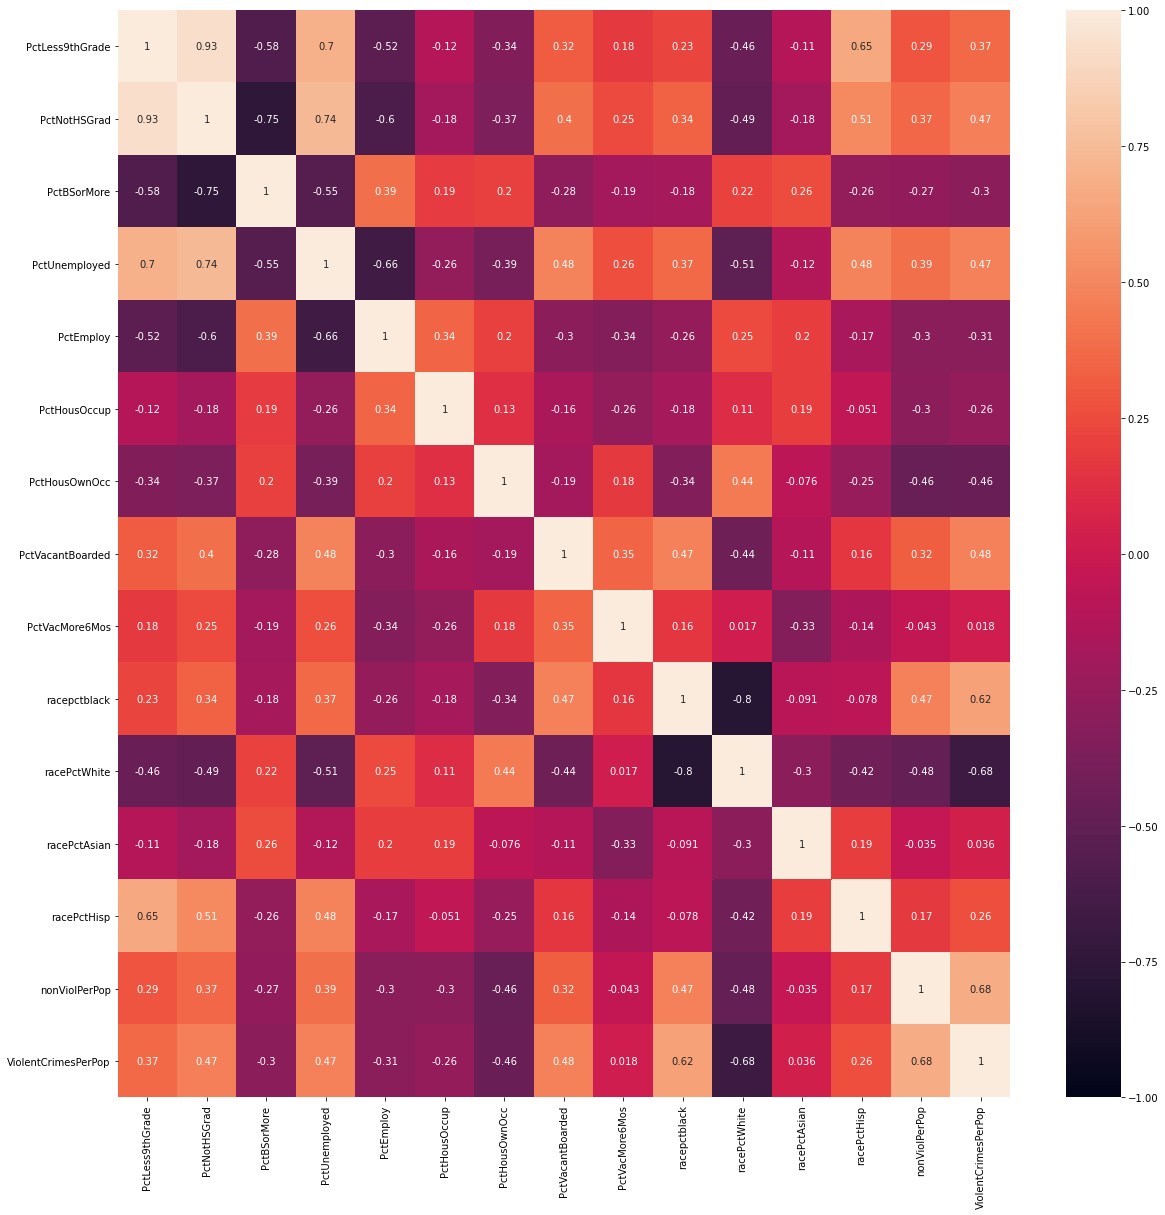

In [10]:
# Make heatmap
plt.figure(figsize=(20,20))
sns.heatmap(crime_corr,annot=True,vmin=-1.0)

# Train/test split data

## Dependent Variable: ViolentCrimesPerPop

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

X = crime[['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                  'PctUnemployed', 'PctEmploy',
                   'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                   'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp']]

y = crime['ViolentCrimesPerPop']

# Standardize Data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.fit_transform(X)

# train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [12]:
# check size
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1426, 13) (1426,)
(476, 13) (476,)


## Model Evaluation

In [13]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

572.9039340813464

In [14]:
from sklearn.dummy import DummyRegressor

#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[572.90393408]])

## Regression Evaluation Metrics

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
# make predictions
y_tr_pred = train_mean * np.ones(len(y_train))
y_tr_pred[:5]

array([572.90393408, 572.90393408, 572.90393408, 572.90393408,
       572.90393408])

In [17]:
# make predictions using Dummy Regressor
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([572.90393408, 572.90393408, 572.90393408, 572.90393408,
       572.90393408])

Both methods produce the same values

In [18]:
# make predictions using test set
y_te_pred = dumb_reg.predict(X_test)

### R-squared

In [19]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0045416723804752035)

### Mean absolute error

In [20]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(433.6354059354524, 456.35675875399244)

### Mean squared error

In [21]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(356128.09161222284, 411218.1808716263)

### Apply Machine Learning Models

#### 1. Linear Regression (Multiple)

In [27]:
from sklearn.linear_model import LinearRegression

# fit a model
lm = LinearRegression(normalize=True)

# train model on test data
model = lm.fit(X_train, y_train)

# Evaluate model
print('Accuracy score (training)', model.score(X_train, y_train))
print('Accuracy score (validation)', model.score(X_test, y_test))

# Use model to make predictions
y_pred = lm.predict(X_test)

# Calculate coeffcient and intercept
coefficients = model.coef_
intercepts = model.intercept_

Accuracy score (training) 0.597982812828326
Accuracy score (validation) 0.5601551616536493


Compute cross-validation score for Linear Regression model

In [28]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(lm, X_train, y_train, cv=10)
cv_results_test = cross_val_score(lm, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.54346098 0.47858682 0.56676243 0.39574553 0.50033674 0.44030637
 0.5780324  0.53639008 0.61427142 0.65834204]
Mean cross validation test score: 0.5312234816571222
Mean cross vaidation train score: 0.5784274930133041
Standard deviation in cross validation test scores 0.0755191599667172


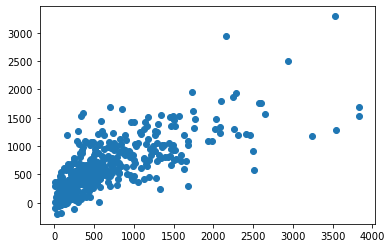

In [29]:
plt.scatter(y_test, y_pred)

In [30]:
import statsmodels.api as sm

# Use statsmodel OLS method
X = sm.add_constant(X)
model2 = sm.OLS(y_train,X_train).fit()
print(model2.summary())
print('\n r2/variance: ', model2.rsquared)

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.782
Model:                             OLS   Adj. R-squared (uncentered):              0.780
Method:                  Least Squares   F-statistic:                              390.8
Date:                 Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                         20:07:11   Log-Likelihood:                         -10516.
No. Observations:                 1426   AIC:                                  2.106e+04
Df Residuals:                     1413   BIC:                                  2.113e+04
Df Model:                           13                                                  
Covariance Type:             nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [31]:
# show values
print("The coeffcient of our model is: ", coefficients[0])
print("The intercept for our model is: ", intercepts)
print ("Linear model Train dataset score is: ", model.score(X_train,y_train))
print ("Linear model Test dataset score is: ", model.score(X_test,y_test))

The coeffcient of our model is:  -43.67597214824818
The intercept for our model is:  3088.7253621596296
Linear model Train dataset score is:  0.597982812828326
Linear model Test dataset score is:  0.5601551616536493


#### 2. Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 123)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb.score(X_train, y_train))
    print("Accuracy score (validation):", gb.score(X_test, y_test))

Learning rate:  0.05
Accuracy score (training): 0.6573455081457029
Accuracy score (validation): 0.5567523979999003
Learning rate:  0.1
Accuracy score (training): 0.7077932577843228
Accuracy score (validation): 0.5572267494599787
Learning rate:  0.25
Accuracy score (training): 0.7650264191380836
Accuracy score (validation): 0.5626985953763404
Learning rate:  0.5
Accuracy score (training): 0.8093067748456814
Accuracy score (validation): 0.5221703564661594
Learning rate:  0.75
Accuracy score (training): 0.8443993341133249
Accuracy score (validation): 0.5179641902196486
Learning rate:  1
Accuracy score (training): 0.8526456476781175
Accuracy score (validation): 0.44268435224247504


Compute cross-validation score for Gradient Boosting

In [33]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(gb, X_test, y_test, cv=10)
cv_results_train = cross_val_score(gb, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[-0.01001944  0.26319446  0.20511473  0.17951815  0.18272095 -0.16922085
 -0.13018772  0.31180815  0.52600415  0.11798083]
Mean cross validation test score: 0.14769134099089154
Mean cross vaidation train score: 0.39257420453564695
Standard deviation in cross validation test scores 0.19807545436921173


#### 3. Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model_res = rfr.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

print('Accuracy score (training)', rfr.score(X_train, y_train))
print('Accuracy score (validation)', rfr.score(X_test, y_test))

Accuracy score (training) 0.9386383769437657
Accuracy score (validation) 0.5808700888850928


Compute cross-validation score for Random Forest Regressor

In [35]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(rfr, X_test, y_test, cv=10)
cv_results_train = cross_val_score(rfr, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[0.49672895 0.54347392 0.41499059 0.40793263 0.4487462  0.49051087
 0.47477976 0.67369277 0.63113202 0.57959119]
Mean cross validation test score: 0.5161578911777186
Mean cross vaidation train score: 0.571891203591031
Standard deviation in cross validation test scores 0.08487962462118599


#### 4. Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print('Accuracy score (training)', ridge.score(X_train, y_train))
print('Accuracy score (validation)', ridge.score(X_test, y_test))

Accuracy score (training) 0.5858657295426284
Accuracy score (validation) 0.5562054857698624


Compute cross-validation score for Ridge Regression

In [37]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(ridge, X_test, y_test, cv=10)
cv_results_train = cross_val_score(ridge, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[0.55758602 0.50243277 0.53609376 0.39227968 0.5333175  0.45559631
 0.57747062 0.54113575 0.56631436 0.64284222]
Mean cross validation test score: 0.5305069001211103
Mean cross vaidation train score: 0.5686396053443892
Standard deviation in cross validation test scores 0.06519115783295232


#### 5. Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print('Accuracy score (training)', lasso.score(X_train, y_train))
print('Accuracy score (validation)', lasso.score(X_test, y_test))

Accuracy score (training) 0.5936899884771085
Accuracy score (validation) 0.5556500535562932


Compute cross-validation score for Lasso Regression

In [39]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(lasso, X_test, y_test, cv=10)
cv_results_train = cross_val_score(lasso, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[0.55541763 0.48905408 0.55643572 0.40942072 0.51181758 0.44335457
 0.57246193 0.53959739 0.60285007 0.65113992]
Mean cross validation test score: 0.5331549598740312
Mean cross vaidation train score: 0.5758218231509935
Standard deviation in cross validation test scores 0.06868512532924483


#### 6. K-Nearest Neighbor (Regressor)

For weights use 'uniform'

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
knr.fit(X_train, y_train)

knr_pred = knr.predict(X_test)

print('Accuracy score (training)', knr.score(X_train, y_train))
print('Accuracy score (validation)', knr.score(X_test, y_test))

Accuracy score (training) 0.6967221791280087
Accuracy score (validation) 0.5007671807438974


For weights use 'distance'

In [41]:
knr_2 = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knr_2.fit(X_train, y_train)

knr_pred = knr_2.predict(X_test)

print('Accuracy score (training)', knr_2.score(X_train, y_train))
print('Accuracy score (validation)', knr_2.score(X_test, y_test))

Accuracy score (training) 1.0
Accuracy score (validation) 0.49785931731467803


Compute cross-validation score for K-Nearest Neighbor

In [42]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(knr_2, X_test, y_test, cv=10)
cv_results_train = cross_val_score(knr_2, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[0.51477778 0.5399766  0.30276834 0.4409961  0.39124354 0.49054902
 0.46699503 0.54858169 0.42054602 0.50736048]
Mean cross validation test score: 0.46237945914455236
Mean cross vaidation train score: 0.516020952695056
Standard deviation in cross validation test scores 0.07195773682258988


#### 7. SVM (Regression)

In [43]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)

regr_pred = regr.predict(X_test)

print('Accuracy score (training)', regr.score(X_train, y_train))
print('Accuracy score (validation)', regr.score(X_test, y_test))

Accuracy score (training) 0.005156149289630041
Accuracy score (validation) -0.035707198429784315


Compute cross-validation score for SVM

In [44]:
from sklearn.model_selection import cross_val_score

cv_results_test = cross_val_score(regr, X_test, y_test, cv=10)
cv_results_train = cross_val_score(regr, X_train, y_train, cv=10)

print(cv_results_test)

print('Mean cross validation test score:', cv_results_test.mean())
print('Mean cross vaidation train score:', cv_results_train.mean())
print('Standard deviation in cross validation test scores', cv_results_test.std())

[-0.12043606 -0.04406476 -0.29080468  0.00216661 -0.13891102 -0.07271106
 -0.00672941 -0.0366839  -0.07368411 -0.11925356]
Mean cross validation test score: -0.09011119384777658
Mean cross vaidation train score: -0.008668229230079183
Standard deviation in cross validation test scores 0.08089700223848925


### Comaprison of models

In [45]:
myLabels = [ 'Linear Regression','Gradient Boosting','Random Forest','Ridge Regression','Lasso Regression','KNN','SVM']
Accuracy_score = [model.score(X_test, y_test), gb.score(X_test, y_test), 
                  rfr.score(X_test, y_test), ridge.score(X_test, y_test),
                  lasso.score(X_test, y_test), knr.score(X_test, y_test),
                  regr.score(X_test, y_test)]

accuracy_df = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

accuracy_df

,Algorithm,Model accuracy score
0,Linear Regression,0.560155
1,Gradient Boosting,0.442684
2,Random Forest,0.580870
3,Ridge Regression,0.556205
4,Lasso Regression,0.555650
5,KNN,0.500767
6,SVM,-0.035707


Linear Regression and Random Forest are the top performers

### Hyperparameter Tuning

#### Parameter Tuning for Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(estimator=lr, param_grid=params, cv=None)
grid = grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_score_)
print('Residual sum of squares: ', np.mean((grid.predict(X_test) - y_test) ** 2))

LinearRegression(normalize=True)
0.587505633421026
Residual sum of squares:  180054.44598624326


#### Fitting Linear Regression with optimal hyperparameters

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

y_predictions = cross_val_predict(lr, X_test, y_test, cv=5)
acc = r2_score(y_test, y_predictions)
cv = cross_val_score(lr, X_train, y_train, cv=5).mean()
y_hat = lr.predict(X_test)
print(acc)
print(cv)

0.5452377014320198
0.587505633421026


#### Feature Importances

            Features  Importance scores (Coefficients)
0              const                        -43.675972
1    PctLess9thGrade                        -16.367967
2       PctNotHSGrad                        -12.792997
3        PctBSorMore                         -6.552172
4      PctUnemployed                         -5.380249
5          PctEmploy                         -4.751642
6       PctHousOccup                         -1.900757
7      PctHousOwnOcc                          0.143150
8   PctVacantBoarded                          3.143726
9     PctVacMore6Mos                          3.661888
10      racepctblack                          5.872149
11      racePctWhite                         31.751488
12      racePctAsian                         34.036442


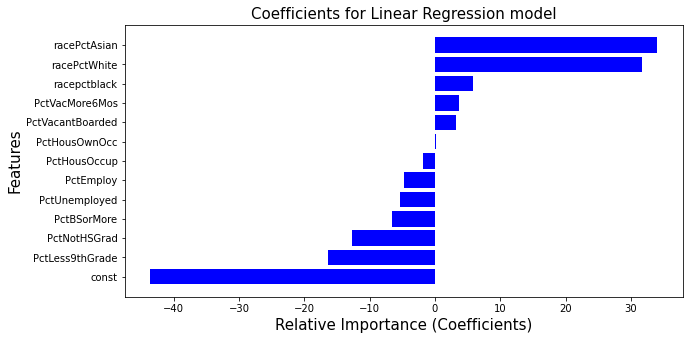

In [48]:
# get importance
features = X
importance = list(lr.coef_)
imp = np.sort(importance)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores (Coefficients)']) 
print(tab)

# make a horizontal bar chart for features & importance scores
plt.figure(figsize=(10,5))
index=list(range(0,13))
plt.barh(index, imp, align='center',color='b')
plt.xlabel('Relative Importance (Coefficients)',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Coefficients for Linear Regression model',fontsize=15)
plt.show()

#### Parameter tuning for Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(max_features='auto', random_state=1, n_jobs=-1)
params = {'criterion':['mse', 'mae'], 'min_samples_leaf':[1,5,10], 'min_samples_split':[2,4,6,8,10], 
          'n_estimators':[10,50,100,150]}

gs = GridSearchCV(estimator=rfr, param_grid=params, cv=None)
gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestRegressor(min_samples_leaf=5, n_estimators=150, n_jobs=-1,
                      random_state=1)
0.5819371986647222


#### Fitting Random Forest with Optimal Hyperparameters

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

rfr = RandomForestRegressor(min_samples_leaf=5, n_estimators=150, n_jobs=-1, random_state=1)
rfr.fit(X_train, y_train)

y_predictions = cross_val_predict(rfr, X_test, y_test, cv=5)
acc = r2_score(y_test, y_predictions)
cv = cross_val_score(rfr, X_train, y_train, cv=5).mean()
y_hat = rfr.predict(X_test)
print(acc)
print(cv)

0.5388137191740119
0.5819371986647222


#### Feature importances

            Features  Importance scores
0              const           0.021564
1    PctLess9thGrade           0.027850
2       PctNotHSGrad           0.031117
3        PctBSorMore           0.031263
4      PctUnemployed           0.031810
5          PctEmploy           0.032788
6       PctHousOccup           0.035632
7      PctHousOwnOcc           0.038366
8   PctVacantBoarded           0.052973
9     PctVacMore6Mos           0.068381
10      racepctblack           0.068527
11      racePctWhite           0.069180
12      racePctAsian           0.490550


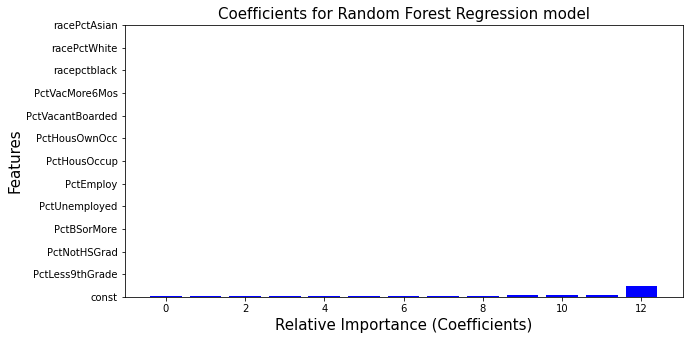

In [52]:
from sklearn.ensemble import RandomForestRegressor

# define and fit model
features = X
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# get importance
importance = list(rfr.feature_importances_)
imp = np.sort(importance)
tab=pd.DataFrame(list(zip(X,imp)),columns=['Features', 'Importance scores']) 
print(tab)

# make a bar chart for features & importance scores
plt.figure(figsize=(10,5))
index=list(range(0,13))
plt.bar(index, imp, align='center',color='b')
plt.ylim(0, 0.5)
plt.xlabel('Relative Importance (Coefficients)',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Coefficients for Random Forest Regression model',fontsize=15)
plt.show()

## Dependent Variable: NonViolCrime

In [54]:
# Subset data
X = crime[['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                  'PctUnemployed', 'PctEmploy',
                   'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                   'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
                  ]]
y = crime['nonViolPerPop']

# Standardize data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.fit_transform(X)

# train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [55]:
# check size
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1426, 13) (1426,)
(476, 13) (476,)


## Regression evaluation metrics

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [57]:
# make predictions using Dummy Regressor
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([572.90393408, 572.90393408, 572.90393408, 572.90393408,
       572.90393408])

In [58]:
# make predictions using test set
y_te_pred = dumb_reg.predict(X_test)

### R-squared

In [59]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(-2.4316494172992744, -2.5476090676426)

### Mean absolute error

In [60]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(4351.286292850273, 4427.03784715429)

### Mean squared error

In [61]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(26714405.99612987, 27268004.07287116)

### Apply Machine Learning Models

#### 1. Multiple Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

# fit a model
lm = LinearRegression(normalize=True)

# train model on test data
model = lm.fit(X_train, y_train)

# Evaluate model
print('Accuracy score (training)', model.score(X_train, y_train))
print('Accuracy score (validation)', model.score(X_test, y_test))

# Use model to make predictions
y_pred = lm.predict(X_test)

# Calculate coeffcient and intercept
coefficients = model.coef_
intercepts = model.intercept_

Accuracy score (training) 0.4140846248140474
Accuracy score (validation) 0.4214801389154209


Compute cross-validation score for Linear Regression

In [63]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(lm, X_train, y_train, cv=10)
cv_results_test = cross_val_score(lm, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.31236538 0.21556359 0.46713187 0.45585848 0.53466848 0.36795096
 0.56123162 0.36090914 0.47615565 0.50226488]
Mean cross validation test score: 0.4254100056940107
Mean cross vaidation train score: 0.4018338258854741
Standard deviation in cross validation test scores 0.10286449817613165


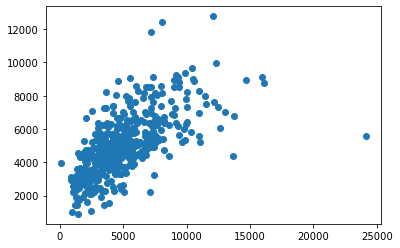

In [64]:
plt.scatter(y_test, y_pred)

In [65]:
import statsmodels.api as sm

# Use statsmodel OLS method
X = sm.add_constant(X)
model2 = sm.OLS(y_train,X_train).fit()
print(model2.summary())
print('\n r2/variance: ', model2.rsquared)

                                 OLS Regression Results                                
Dep. Variable:          nonViolPerPop   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              611.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        21:07:00   Log-Likelihood:                         -12997.
No. Observations:                1426   AIC:                                  2.602e+04
Df Residuals:                    1413   BIC:                                  2.609e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [66]:
# show values
print("The coeffcient of our model is: ", coefficients[0])
print("The intercept for our model is: ", intercepts)
print ("Linear model Train dataset score is: ", model.score(X_train,y_train))
print ("Linear model Test dataset score is: ", model.score(X_test,y_test))

The coeffcient of our model is:  -68.27966084811489
The intercept for our model is:  21266.072587222396
Linear model Train dataset score is:  0.4140846248140474
Linear model Test dataset score is:  0.4214801389154209


#### 2. Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 123)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.507
Accuracy score (validation): 0.402

Learning rate:  0.1
Accuracy score (training): 0.559
Accuracy score (validation): 0.412

Learning rate:  0.25
Accuracy score (training): 0.641
Accuracy score (validation): 0.394

Learning rate:  0.5
Accuracy score (training): 0.705
Accuracy score (validation): 0.345

Learning rate:  0.75
Accuracy score (training): 0.757
Accuracy score (validation): 0.255

Learning rate:  1
Accuracy score (training): 0.771
Accuracy score (validation): 0.218



Compute cross-validation score for Gradient Boosting

In [68]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(gb, X_train, y_train, cv=10)
cv_results_test = cross_val_score(gb, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[-0.26507284  0.04066612  0.07044406  0.35793952  0.10366927  0.00116931
 -0.4552443  -0.00508649 -0.04787693  0.20232795]
Mean cross validation test score: 0.0002935663899848451
Mean cross vaidation train score: 0.22967183457145096
Standard deviation in cross validation test scores 0.21592829375846906


#### 3. Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model_res = rfr.fit(X_train, y_train)
y_pred = model_res.predict(X_test)

print('Accuracy score (training)', rfr.score(X_train, y_train))
print('Accuracy score (validation)', rfr.score(X_test, y_test))

Accuracy score (training) 0.9187182943467472
Accuracy score (validation) 0.3682969053765718


Compute cross-validation score for Random Forest

In [70]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(rfr, X_train, y_train, cv=10)
cv_results_test = cross_val_score(rfr, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.19444746 0.2825071  0.53336093 0.29128621 0.54482357 0.28299533
 0.50966294 0.23891298 0.36011036 0.40898425]
Mean cross validation test score: 0.36470911313838256
Mean cross vaidation train score: 0.43418753487387696
Standard deviation in cross validation test scores 0.12145642613235423


#### 4. Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print('Accuracy score (training)', ridge.score(X_train, y_train))
print('Accuracy score (validation)', ridge.score(X_test, y_test))

Accuracy score (training) 0.41158799472737584
Accuracy score (validation) 0.4148732922389131


Compute cross-validation score for Ridge Regression

In [72]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(ridge, X_train, y_train, cv=10)
cv_results_test = cross_val_score(ridge, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.25918689 0.22754578 0.48621828 0.45862641 0.51761976 0.39750609
 0.53464728 0.36429228 0.44841263 0.51545761]
Mean cross validation test score: 0.4209512995372008
Mean cross vaidation train score: 0.40355011262144264
Standard deviation in cross validation test scores 0.10245470621821257


#### 5. Lasso Regression

In [73]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print('Accuracy score (training)', lasso.score(X_train, y_train))
print('Accuracy score (validation)', lasso.score(X_test, y_test))

Accuracy score (training) 0.4139381411524351
Accuracy score (validation) 0.42039622245510333


Compute cross-validation score for Lasso Regression

In [74]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(lasso, X_train, y_train, cv=10)
cv_results_test = cross_val_score(lasso, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.30718924 0.21599069 0.46898853 0.45930963 0.5349177  0.37327097
 0.56077635 0.36176876 0.47264463 0.5018628 ]
Mean cross validation test score: 0.42567192919158076
Mean cross vaidation train score: 0.4022952203199856
Standard deviation in cross validation test scores 0.10297620839408811


#### 6. K-Nearest Neighbor (Regressor)

For weights use 'uniform'

In [75]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
knr.fit(X_train, y_train)

knr_pred = knr.predict(X_test)

print('Accuracy score (training)', knr.score(X_train, y_train))
print('Accuracy score (validation)', knr.score(X_test, y_test))

Accuracy score (training) 0.5581419526879214
Accuracy score (validation) 0.27371675368715265


For weights use 'distance'

In [76]:
from sklearn.neighbors import KNeighborsRegressor

knr_2 = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knr_2.fit(X_train, y_train)

knr_pred = knr_2.predict(X_test)

print('Accuracy score (training)', knr_2.score(X_train, y_train))
print('Accuracy score (validation)', knr_2.score(X_test, y_test))

Accuracy score (training) 1.0
Accuracy score (validation) 0.2805803657141579


Compute cross-validation score for K-Nearest Neighbors

In [77]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(knr_2, X_train, y_train, cv=10)
cv_results_test = cross_val_score(knr_2, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[0.17550572 0.28491104 0.35660624 0.24216419 0.51814535 0.31980075
 0.47485257 0.42857489 0.3259551  0.37445653]
Mean cross validation test score: 0.3500972370061999
Mean cross vaidation train score: 0.33718317095708533
Standard deviation in cross validation test scores 0.09923721407631989


#### 7. SVM Regression

In [78]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)

regr_pred = regr.predict(X_test)

print('Accuracy score (training)', regr.score(X_train, y_train))
print('Accuracy score (validation)', regr.score(X_test, y_test))

Accuracy score (training) -0.012343445322983593
Accuracy score (validation) -0.023573828026107746


Compute cross-validation score for SVM

In [79]:
from sklearn.model_selection import cross_val_score

cv_results_train = cross_val_score(regr, X_train, y_train, cv=10)
cv_results_test = cross_val_score(regr, X_test, y_test, cv=10)

print(cv_results_test)

cv_train_mean = cv_results_train.mean()
cv_test_mean = cv_results_test.mean()
cv_test_std = cv_results_test.std()

print('Mean cross validation test score:', cv_test_mean)
print('Mean cross vaidation train score:', cv_train_mean)
print('Standard deviation in cross validation test scores', cv_test_std)

[ 0.00486397 -0.02406505 -0.18466742 -0.02556025 -0.03653501  0.00567923
  0.0037213  -0.01911397 -0.02219195 -0.02117771]
Mean cross validation test score: -0.03190468663874095
Mean cross vaidation train score: -0.019086723734436473
Standard deviation in cross validation test scores 0.052788547545049753


### Comparison of Models

In [80]:
myLabels = [ 'Linear Regression','Gradient Boosting','Random Forest','Ridge Regression','Lasso Regression','KNN','SVM']
Accuracy_score = [model.score(X_test, y_test), gb.score(X_test, y_test), 
                  rfr.score(X_test, y_test), ridge.score(X_test, y_test),
                  lasso.score(X_test, y_test), knr.score(X_test, y_test),
                  regr.score(X_test, y_test)]

accuracy_df = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

accuracy_df

,Algorithm,Model accuracy score
0,Linear Regression,0.421480
1,Gradient Boosting,0.218447
2,Random Forest,0.368297
3,Ridge Regression,0.414873
4,Lasso Regression,0.420396
5,KNN,0.273717
6,SVM,-0.023574


Linear Regression and Lasso Regression are the top performers

### Hyperparameter Tuning

#### Paramter Tuning for Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(estimator=lr, param_grid=params, cv=None)
grid = grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_score_)
print('Residual sum of squares: ', np.mean((grid.predict(X_test) - y_test) ** 2))

LinearRegression(normalize=True)
0.3995721140924485
Residual sum of squares:  4446679.898350175


#### Fitting Linear Regression with optimal parameters

In [82]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

y_predictions = cross_val_predict(lr, X_test, y_test, cv=5)
acc = r2_score(y_test, y_predictions)
cv = cross_val_score(lr, X_train, y_train, cv=5).mean()
y_hat = lr.predict(X_test)
print(acc)
print(cv)

0.4171040457566756
0.3995721140924485


#### Feature Importances

            Features  Importance scores (Coefficients)
0              const                       -110.176435
1    PctLess9thGrade                        -68.279661
2       PctNotHSGrad                        -43.435640
3        PctBSorMore                        -34.192700
4      PctUnemployed                        -33.402981
5          PctEmploy                        -15.338687
6       PctHousOccup                        -14.203891
7      PctHousOwnOcc                         -9.323151
8   PctVacantBoarded                         -1.160332
9     PctVacMore6Mos                          8.249100
10      racepctblack                         41.629904
11      racePctWhite                         50.087039
12      racePctAsian                         94.388425


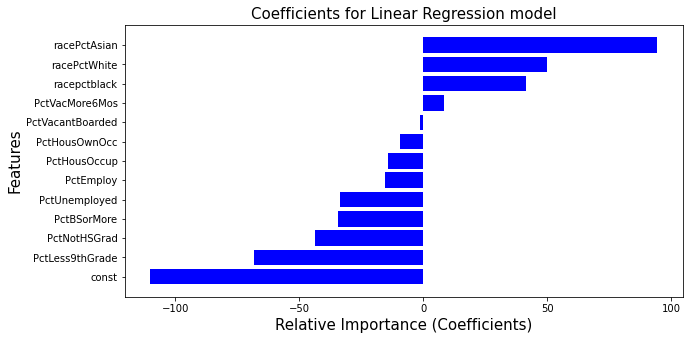

In [83]:
# get importance
features=X
importance = list(lr.coef_)
imp = np.sort(importance)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores (Coefficients)']) 
print(tab)

# make a horizontal bar chart for features & importance scores
plt.figure(figsize=(10,5))
index=list(range(0,13))
plt.barh(index, imp, align='center',color='b')
plt.xlabel('Relative Importance (Coefficients)',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Coefficients for Linear Regression model',fontsize=15)
plt.show()

#### Parameter Tuning for Lasso Regression

In [84]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha':[0,0.1,0.5,1,5,10,50], 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False],
          'max_iter':[0,10,50,100,200,500,1000], 'positive':[True,False]}

grid = GridSearchCV(estimator=lasso, param_grid=params, cv=None)
grid = grid.fit(X_train, y_train)

print(grid.best_estimator_)
print(grid.best_score_)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2673586918.6369667, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587653914.474332, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3132740836.791102, tolerance: 868951.5946606068
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2950491734.01083, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587641907.777265, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2950491734.0108304, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587641907.747209, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2390783295.0659685, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.e

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350581735.23887, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = c

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107743464.32697582, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115331152.71318436, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2867490870.6284747, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2758622259.38125, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833569605.299325, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2819765935.660441, tolerance: 3674406.65504454
  model = 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2838444182.189773, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tole

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2655016996.501746, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3180494524.2355294, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3115714736.1464953, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2672093450.095768, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2670423008.1366997, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2390783295.0659695, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.ene

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3320483502.7269325, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115781502.31154728, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2998625986.5682487, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2788126865.0457835, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2842164453.4312263, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833569605.299325, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2819765935.660441, tolerance: 3674406.65504454
  model = 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74306082.45724106, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17175903.172798157, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9573272.024158478, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You m

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3115018852.2676544, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93806225.11487103, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107743805.95576286, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2872959613.047443, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2624149729.3748293, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8060377.796242714, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2806550183.1225033, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2716541553.899049, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2792017658.928082, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1751117972.461522, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1643074970.371982, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1449812495.7445486, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35541564.04324913, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60335347.41790199, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236551243.1515584, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3302642955.1060586, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350546551.865067, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3335009916.3033915, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42137754.69820118, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2867265130.576498, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2787944060.559402, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2758355868.2271733, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833306706.5961223, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2855272605.1726575, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093298549.383722, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257736785.753097, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869354985.357764, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3392072003.720299, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3302542799.7015815, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3350405758.136115, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43625966.59954071, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42139614.06546688, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2866463443.6743627, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811326315.4020934, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2724937340.2225037, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2798660475.127072, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20974604.152978897, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1712605.414158821, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3087085.935699463, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16016486.718133926, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329561291.12690544, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347317224.43288517, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334486191.0416126, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2871723561.2957554, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2623277150.8065786, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35293408.84452438, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811326315.4020934, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2724937340.2225037, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2798660475.127072, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586755537.0249605, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733391080.7721081, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1371017125.0232735, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2839348325.395973, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3391879357.577867, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3302417479.1120696, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35300101.47907162, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36072162.950758934, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44979004.819568634, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2851445038.7270656, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2600372467.771762, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2802923359.8094683, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9380654.181515694, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not c

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You m

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3114723694.89489, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329546566.4164305, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347304563.45716095, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44979004.819568634, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43634061.67965317, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42141938.42250061, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2755956763.481482, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2830939227.496493, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2851445038.7270656, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1016148357.4668238, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901076357.9048386, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1571078629.1813674, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3390333273.3877854, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3301409860.7783484, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3348815187.511262, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2857376000.3344374, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2778912335.1443605, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2858702997.463173, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2834413175.219534, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587653716.4087687, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2736971636.3474517, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52682077.55366421, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76573649.71578598, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257501998.8856659, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334267645.18390465, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2134072732.9788423, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3390333273.3877854, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43700059.39691067, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42160539.19661045, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2857376000.3344374, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2736971636.3474517, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2678688165.2853065, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745527849.2369237, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115953480.0389595, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115135463.98015499, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117241738.49275684, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1280947892.117237, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10108965.300805092, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2809549517.305067, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2092094627.5707753, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2023965048.570612, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2091941080.246017, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469395.721670151, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85732667.31432438, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2311607759.056362, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0001, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. Yo

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2891032385.4975557, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811369602.097177, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2894255111.86614, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43781097.75172043, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42184012.54536247, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2847130681.3833146, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2469092831.9041486, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2092094627.5707753, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2023965048.570612, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902062.5199756622, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166898646.7040243, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060797275.4017384, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332093266.2510052, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333119604.802124, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897626021.0588679, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45713734.04937172, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44435756.02448273, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42357223.61096954, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2636849732.477258, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2440510615.6477513, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2112995165.4379025, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902062.5199756622, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166898646.7040243, tolerance: 912589.0565011121
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060797275.4017384, tolerance: 901350.0082488592
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897626021.0588679, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3372337544.518356, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3289454779.9717135, tolerance: 3652088.36229042
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44435756.02448273, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42357223.61096954, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2759424472.75272, tolerance: 3674406.65504454
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2291108634.6579967, tolerance: 3694117.34235984
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2143254915.3890417, tolerance: 3639189.9283017907
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2062988890.2872062, tolerance: 3608875.581052531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

Lasso(alpha=50, max_iter=10)
0.40213837966019306


C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669565200.3335881, tolerance: 1110100.0806912833
  model = cd_fast.enet_coordinate_descent(


#### Fitting Lasso Regression with optimal hyperparameters

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

lasso = Lasso(alpha=50, max_iter=10)
lasso.fit(X_train, y_train)

y_predictions = cross_val_predict(lasso, X_test, y_test, cv=5)
acc = r2_score(y_test, y_predictions)
cv = cross_val_score(lasso, X_train, y_train, cv=5).mean()
y_hat = lasso.predict(X_test)
print(acc)
print(cv)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669565200.3335881, tolerance: 1110100.0806912833
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482382395.7538492, tolerance: 269986.2651179813
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690499393.4167187, tolerance: 306695.3105728679
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

0.4160494100383483
0.40213837966019306


C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842328863.8318324, tolerance: 893970.8144369086
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224539919.80456495, tolerance: 868951.5946606068
  model = cd_fast.enet_coordinate_descent(
C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77040647.29024792, tolerance: 863372.9902811014
  model = cd_fast.enet_coordinate_descent(


#### Feature importances

            Features  Importance scores (Coefficients)
0              const                       -109.064763
1    PctLess9thGrade                        -45.890463
2       PctNotHSGrad                        -42.894850
3        PctBSorMore                        -33.929250
4      PctUnemployed                        -30.828892
5          PctEmploy                        -16.819440
6       PctHousOccup                         -9.668281
7      PctHousOwnOcc                         -0.000000
8   PctVacantBoarded                          0.000000
9     PctVacMore6Mos                          4.927079
10      racepctblack                         29.151054
11      racePctWhite                         50.440241
12      racePctAsian                         88.210876


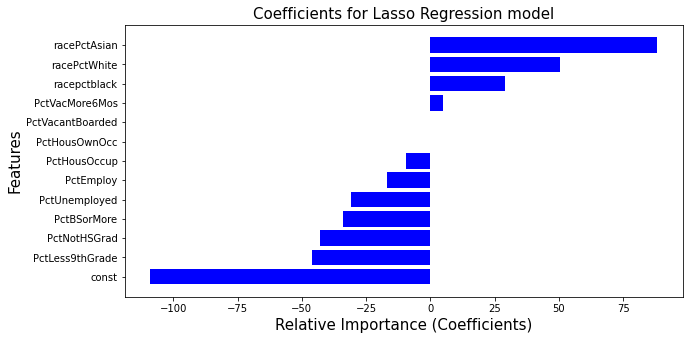

In [86]:
# get importance
importance = list(lasso.coef_)
imp = np.sort(importance)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores (Coefficients)']) 
print(tab)

# make a horizontal bar chart for features & importance scores
plt.figure(figsize=(10,5))
index=list(range(0,13))
plt.barh(index, imp, align='center',color='b')
plt.xlabel('Relative Importance (Coefficients)',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Coefficients for Lasso Regression model',fontsize=15)
plt.show()